<a href="https://www.kaggle.com/code/dsptlp/lda-vs-pca?scriptVersionId=164034181" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Comparison of LDA and PCA 2D projection of Iris dataset


The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour
and Virginica) with 4 attributes: sepal length, sepal width, petal length
and petal width.

Principal Component Analysis (PCA) applied to this data identifies the
combination of attributes (principal components, or directions in the
feature space) that account for the most variance in the data. Here we
plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that
account for the most variance *between classes*. In particular,
LDA, in contrast to PCA, is a supervised method, using known class labels.

## Guidelines for Choosing Between PCA and LDA:
### Task Type:

- Use PCA for unsupervised learning tasks, dimensionality reduction, and exploring the overall structure of the data.
- Use LDA when the goal is supervised classification, and preserving class separability is crucial.

### Data Labels:

- If you have labeled data and your goal is classification, LDA is typically more suitable.
- If you have unlabeled data or you're focused on overall variance, PCA might be more appropriate.

### Trade-Off:

- PCA is generally more concerned with capturing overall variance in the data.
- LDA is more focused on capturing the variance that is relevant to the differences between classes.

In summary, choose PCA for unsupervised tasks and dimensionality reduction, and use LDA when class separability is a priority in a supervised classification setting.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [2]:
# Load the Iris dataset
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target
target_names = iris_data.target_names

In [3]:
# Apply PCA (Principal Component Analysis) to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [4]:
# Apply LDA (Linear Discriminant Analysis) to reduce dimensionality to 2 components
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

In [5]:
# Print the percentage of variance explained for each component in PCA
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92461872 0.05306648]


In [6]:
# Function to plot scatter plots for given results, title, and labels
def plot_scatter(X_result, title, labels):
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2

    # Plot each class with a different color
    for color, i, target_name in zip(colors, [0, 1, 2], labels):
        plt.scatter(X_result[y == i, 0], X_result[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    plt.show()

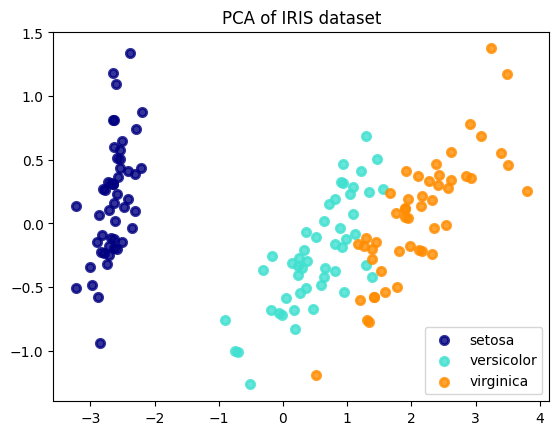

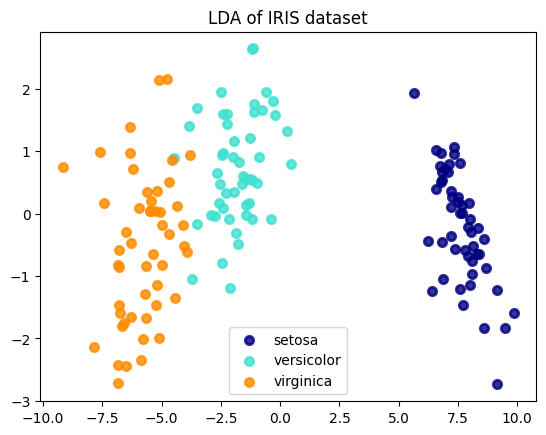

In [7]:
# Plot the results for PCA
plot_scatter(X_r, 'PCA of IRIS dataset', target_names)

# Plot the results for LDA
plot_scatter(X_r2, 'LDA of IRIS dataset', target_names)
